This notebook basically includes the EDA and answers many questions for the channel and video related questions in the form of data analysis.

1. Basic Data Exploration
2. Data cleaning and validation
2. Merging different files together
3. Some feature engineering using LLMs
4. Data Visualization using streamlit

## <b> STEP 1: Importing Library and Loading the Dataset </b>

In [3]:
# Importing packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go



In [7]:
# Loading the channel dataset in a dataframe

channel_df =  pd.read_csv('../Clean_Data/clean_channel_data.csv')

In [4]:
test = pd.read_csv('../Clean_Data/video_quality_with_channel_info.csv',encoding='latin-1' )

In [25]:
good_df = test[['channel_title','overall_score']].loc[test['overall_score'] < 50]
good_df = good_df.groupby('channel_title').mean().reset_index().round(0)

In [ ]:
new_list = ['Intellipaat','Simplilearn']
good_df = good_df.where(['channel_title'] != ('Intellipaat'))


ValueError: Array conditional must be same shape as self

In [8]:
# Loading social_media link dataset

social_medid_link_df = pd.read_csv('../Clean_Data/classified_output.csv')

In [9]:
social_medid_link_df.shape

(275, 7)

In [10]:
social_medid_link_df.duplicated().value_counts()

False    191
True      84
Name: count, dtype: int64

In [11]:
social_medid_link_df.drop_duplicates(subset= ['channel_id'],inplace= True)

In [12]:
social_medid_link_df.shape

(108, 7)

Before merging this dataframe to another dataframe, we removed the duplicate channel_id in the social_medid_link_df.

In [13]:

channel_df = channel_df.merge(social_medid_link_df, how='inner')

In [14]:
channel_df.shape

(110, 15)

The data is loaded perfectly. Next step is to perform few basic data exploration. To be precise following is the some data exploration that will be performed.


## <b> STEP 2 : Data Exploration </b>

In [15]:
# How is the dataset shaped?

channel_df.shape

(110, 15)

We have 119 rows and 9 columns in our data.

In [16]:
# Generate statistical summary of the dataset

channel_df.isnull().sum()

channel_id                    0
channel_title                 0
channel_description           6
Category                      0
subscribers                   0
total_views                   0
total_videos                  0
total_likes                 110
Individual_company_brand      0
github_link                 104
linkedin_link                81
twitter_link                 88
instagram_link               73
course_link                  88
website_link                 31
dtype: int64

We see that all the columns have complete data except for total_likes so we will remove this column in the data cleaning part.

<Axes: >

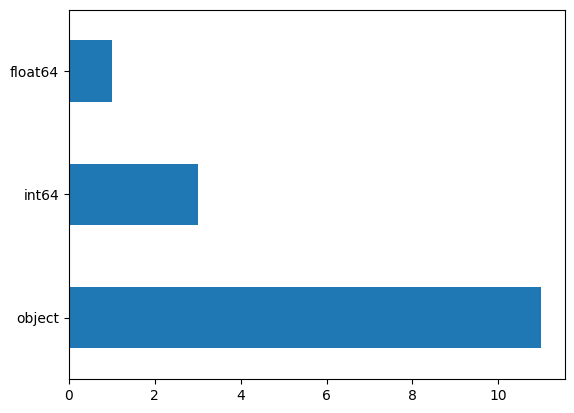

In [17]:
# How do you describe the datatype of each of the columns

channel_df.dtypes.value_counts().plot(kind = 'barh')

For now we have most columns as categorical value 11 categorical values. 4 numeical columns. We have a lot of qualitative analysis that is to be done than the quantative one.

### Initial data cleaning

In [18]:

channel_df.drop_duplicates(subset=['channel_id'],inplace = True)

In [19]:
channel_df.shape

(107, 15)

In [20]:
channel_df

,channel_id,channel_title,channel_description,Category,subscribers,total_views,total_videos,total_likes,Individual_company_brand,github_link,linkedin_link,twitter_link,instagram_link,course_link,website_link
0,UC2UXDak6o7rBm23k3Vv5dww,Tina Huang,Hi! My name is Tina and I�m an ex-Meta data sc...,Data Science,1060000,46431564,293,NaN,Individual,NaN,https://www.linkedin.com/in/tinaw-h/,NaN,https://www.instagram.com/hellotinah/,NaN,https://tinahuang.substack.com/
1,UCNQ6FEtztATuaVhZKCY28Yw,Chai aur Code,A channel dedicated to chai and coding in HIND...,Diverse,797000,78959681,670,NaN,Individual,https://github.com/hiteshchoudhary,NaN,NaN,https://www.instagram.com/hiteshchoudharyoffic...,NaN,https://freeapi.app
2,UCYA8cEWaqrpB4olR5533p5Q,Anwar Haq,"This channel guides aspiring data scientists, ...",Data Science,16000,522650,123,NaN,Individual,NaN,NaN,NaN,NaN,NaN,https://linkly.link/2Gany
3,UCZ50rYSkYQG31YDEJm9Di_g,Coursera,Welcome to Coursera! This channel is your go-t...,Diverse,314000,37321520,1684,NaN,Company/brand,NaN,NaN,NaN,NaN,NaN,https://bit.ly/4hvUS1c
4,UCm5mt-A4w61lknZ9lCsZtBw,Steve Brunton,NaN,Diverse,480000,29826335,560,NaN,Individual,NaN,NaN,NaN,NaN,NaN,http://databookuw.com/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,UCRdJBGp9r9ORl3Svd053IHA,The Incubator Hub,Deliberate and strategic impact to lives and c...,Diverse,53000,2804370,684,NaN,Company/brand,NaN,NaN,NaN,NaN,NaN,https://linktr.ee/theincubatorng
103,UCDR66fGjZxvdZl7g3x0xbWw,Uncodemy,Uncodemy is among a couple of driving organiza...,Data Science,3630,372532,695,NaN,Company/brand,NaN,NaN,NaN,NaN,NaN,https://uncodemy.com
104,UC9JWnvl5ZjZv09F5RqiLptw,SCALER,"SCALER, a school #wherethehungrylearn to enhan...",Diverse,337000,52224655,1987,NaN,Individual,NaN,https://www.linkedin.com/school/scalerofficial,https://twitter.com/scaler_official,https://www.instagram.com/scaler_official/,NaN,https://www.scaler.com/events/?utm_source=osoc...
105,UCVe8CMJF4caRzuckVYV8CaQ,Nishant Chahar,Building Tayyari and Algoprep! ??\n\nI am an E...,Diverse,563000,88566931,806,NaN,Individual,NaN,https://in.linkedin.com/in/chaharnishant11,https://x.com/nishantchahar11,https://www.instagram.com/nishantchahar.11/,NaN,https://bit.ly/Genai-ml-program


In [21]:

channel_df['avg_views_per_video'] = (channel_df['total_views'] / channel_df['total_videos'])
channel_df['engagement_rate'] = (channel_df['avg_views_per_video'] / channel_df['subscribers']) * 100

In [22]:
channel_df.columns

Index(['channel_id', 'channel_title', 'channel_description', 'Category',
       'subscribers', 'total_views', 'total_videos', 'total_likes',
       'Individual_company_brand', 'github_link', 'linkedin_link',
       'twitter_link', 'instagram_link', 'course_link', 'website_link',
       'avg_views_per_video', 'engagement_rate'],
      dtype='object')

## <b> STEP 3 : Some quantitative Data Analysis </b>

1. How many creaters are completely focused in creating data science contents and how many of them are covering diverse range of contents in other field of computerscience?


# Output Analysis:


*  we observe that 44 creators are primarily focused on Data Science content, 59 creators cover a diverse range of topics, and 5 creators are not clearly categorized. For these uncategorized channels, the channel descriptions do not clearly specify the main content focus.



In [23]:
category_counts = channel_df.groupby('Category')['Category'].count()
category_counts

Category
Data Science     44
Diverse          58
Not Available     5
Name: Category, dtype: int64

In [24]:
import plotly.express as px
category_counts = channel_df.groupby("Category").size().reset_index(name="Count")
fig = px.bar(
    category_counts,
    x="Category",
    y="Count",
    color="Count",
    color_continuous_scale="Blues",
    title="Category Counts"
)
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Count",
    coloraxis_showscale=False
)
fig.show()


#  What % of creaters who are completely into creating data science content are individual creaters?

# Output Analysis:
Nearly 68% of Data Science creators are individual creators.





In [25]:
data_Science_individual_creater = (len(channel_df[(channel_df['Category'] == 'Data Science') & (channel_df['Individual_company_brand'] == 'Individual')]) / len(channel_df[(channel_df['Category'] == 'Data Science')]) ) * 100
data_Science_individual_creater


68.18181818181817

# 3. Top 10 channel having the most number of subscribers who make only data science content? And are they individual creaters or a brand/company?

In [26]:
channel_df_top_10_datascience = channel_df[['channel_title','subscribers','Individual_company_brand']].where(channel_df['Category']=='Data Science').sort_values(by = 'subscribers',ascending= False).head(10)

In [27]:
channel_df_top_10_datascience

,channel_title,subscribers,Individual_company_brand
18,Ishan Sharma,2030000.0,Individual
75,codebasics,1420000.0,Individual
43,Krish Naik,1320000.0,Individual
0,Tina Huang,1060000.0,Individual
55,Great Learning,980000.0,Company/brand
56,Google Career Certificates,692000.0,Company/brand
78,Luke Barousse,579000.0,Individual
65,Alura,499000.0,Individual
13,CampusX,437000.0,Company/brand
59,365 Data Science,363000.0,Company/brand


# How do the top Data Science YouTube channels differ in terms of subscribers and total views, and what role does creator type play in this difference?

# output Analysis:


* Individual creators tend to have higher subscriber counts, which leads to consistent and repeat viewership from a loyal audience.
* Brand or company channels often have fewer subscribers but generate high views per video, driven by search-based discovery and course-specific consumption.


In [28]:
channel_df_top_10_datascience_views = channel_df[['channel_title','total_views','Individual_company_brand']].where(channel_df['Category']=='Data Science').sort_values(by = 'total_views',ascending= False).head(10)
channel_df_top_10_datascience_views

,channel_title,total_views,Individual_company_brand
18,Ishan Sharma,414070508.0,Individual
56,Google Career Certificates,315933077.0,Company/brand
75,codebasics,146980946.0,Individual
43,Krish Naik,127602389.0,Individual
55,Great Learning,75180907.0,Company/brand
13,CampusX,54465708.0,Company/brand
0,Tina Huang,46431564.0,Individual
77,Sundas Khalid,42875401.0,Individual
65,Alura,33041487.0,Individual
78,Luke Barousse,29113541.0,Individual


From the observation above we can say that most datascience dedicated channel are led by individual creaters. Creaters like Ishansharma, codebasics, krish Naik are most subscribed channel.

# Which all YouTube channel also provide online courses?

# Output Analysis
*   From the dataset, 20 channels were identified that offer courses related to the Data Science domain. Among these, 11 channels are run by individual creators, while 9 channels are operated by brands or companies providing structured courses or certifications.


In [29]:
filtered_course_link = channel_df.loc[channel_df['course_link'].notna(), ['channel_title', 'Individual_company_brand','course_link']]
print(filtered_course_link)




                 channel_title Individual_company_brand  \
8                     edureka!            Company/brand   
13                     CampusX            Company/brand   
17                       BEPEC               Individual   
19                 Intellipaat            Company/brand   
22              Asimov Academy               Individual   
27               CodeWithHarry               Individual   
28  Avery Smith | Data Analyst               Individual   
36              DecisionForest            Company/brand   
40               Sahil & Sarra               Individual   
44                      Thu Vu               Individual   
46                  The iScale            Company/brand   
48                   DataMites            Company/brand   
53         Sreevidhya Santhosh               Individual   
55              Great Learning            Company/brand   
56  Google Career Certificates            Company/brand   
63          Error Makes Clever               Individual 

In [48]:
course_provider_counts = filtered_course_link['Individual_company_brand'].value_counts()
fig = go.Figure(data=[go.Pie(
    labels=course_provider_counts.index,
    values=course_provider_counts.values,
    hole=0.5,
    marker=dict(colors=['#66b2b2','rgb(255,159,64)']),
    textinfo='label+percent'
)])
fig.update_layout(
    title='Distribution of Data Science Course Providers',
    height=450,
    width=600,
    font=dict(family='Arial', size=14)
)

fig.show()


## `Average Views per Video by Category`




Analysis Results:

*   The "Diverse" category has the highest average views per video 136K, more than double "Data Science" 48.6K and nearly four times "Not Available" ~37.5K
*   "Data Science" performs moderately well per-video but lags significantly behind "Diverse", indicating higher per-video reach in broadly targeted content



In [46]:
import pandas as pd
import plotly.express as px

channel_df.columns = channel_df.columns.str.strip()
channel_df["total_views"] = pd.to_numeric(channel_df["total_views"], errors="coerce")
channel_df["total_videos"] = pd.to_numeric(channel_df["total_videos"], errors="coerce")

channel_df["avg_views_per_video"] = (
    channel_df["total_views"] / channel_df["total_videos"]
)

cat_col = "Category" if "Category" in channel_df.columns else "category"

cat_avg = (
    channel_df
    .dropna(subset=[cat_col, "avg_views_per_video"])
    .groupby(cat_col, as_index=False)["avg_views_per_video"]
    .mean()
    .sort_values("avg_views_per_video", ascending=True)
)

fig = px.bar(
    cat_avg,
    x="avg_views_per_video",
    y=cat_col,
    orientation="h",
    title="Average Views per Video by Category",
    labels={
        "avg_views_per_video": "Average Views per Video",
        cat_col: "Category"
    },
    template="plotly_white"
)
fig.update_traces(marker_color="#66b2b2")

fig.show()


# How does the subscriber distribution differ between Data Science–focused channels and Diverse-content channels?

# Output Analysis

*   Diverse channels outperform in scale: The Diverse category has a higher median and extreme outliers (up to ~12.5M subscribers), indicating broader audience reach compared to Data Science channels.
*  Data Science is more niche and consistent: Subscriber counts are more concentrated with fewer extreme outliers, reflecting a specialized but stable audience base.bold text



In [49]:
category_data = channel_df[channel_df['Category'].isin(['Data Science', 'Diverse'])]

fig2 = go.Figure()

# Define your colors in a list or dictionary to match the loop
colors = ['#66b2b2', 'rgb(255,159,64)']

for i, category in enumerate(['Data Science', 'Diverse']):
    cat_data = category_data[category_data['Category'] == category]
    fig2.add_trace(
        go.Box(
            y=cat_data['subscribers'], 
            name=category,
            marker_color=colors[i]  # Applying the specific colors here
        )
    )

fig2.update_layout(
    title='Subscriber Distribution by Category',
    title_font=dict(size=12, family='Arial Black'),
    xaxis_title='Category',
    yaxis_title='Subscribers (log scale)',
    yaxis_type='log',
    height=500,
    width=800
)

fig2.show()

# Relationship Between Subscribers, Total Views, and Video Count



* Do channels with more subscribers consistently generate higher total views, and how does the number of uploaded videos influence this relationship?

# Output Analysis

*  There is a strong positive correlation between subscribers and total views are channels with more subscribers generally accumulate significantly higher total views.
*   The  channels with a higher number of videos tend to achieve very high total views, but even channels with fewer videos can perform well if they have a strong subscriber base.




In [33]:

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=channel_df['subscribers'], y=channel_df['total_views'],
               mode='markers',
               marker=dict(size=10, color=channel_df['total_videos'],
                          colorscale='Viridis', opacity=0.6,
                          colorbar=dict(title='Total Videos'),
                          showscale=True))
)
fig.update_layout(
    title='Subscribers vs Views (colored by video count)',
    title_font=dict(size=12, family='Arial Black'),
    xaxis_title='Subscribers',
    yaxis_title='Total Views',
    xaxis_type='log',
    yaxis_type='log',
    height=500,
    width=800
)
fig.show()

## Individual vs Company Performance Comparison


*   Individual and Company YouTube channels based on their average subscribers, total views, and total videos,







*  Average Subscribers (M):
Company Based channels have significantly higher average subscribers than Individual channels, indicating stronger reach and brand-driven audience growth.
*  Average Views (M):
Average views are fairly similar between Individual and Company based channels, with Individuals slightly edging higher, suggesting strong per-channel view performance despite smaller subscriber bases.
*  Average Videos:
Both channel types have almost the same average number of videos, meaning content volume is not the main factor differentiating their performance.





In [50]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

perf_comparison = channel_df.groupby('Individual_company_brand').agg({
    'subscribers': 'mean',
    'total_views': 'mean',
    'total_videos': 'mean'
})


fig4 = make_subplots(
    rows=1, cols=3,
    subplot_titles=('Avg Subscribers (M)', 'Avg Views (M)', 'Avg Videos')
)

x_labels = perf_comparison.index


fig4.add_trace(
    go.Bar(x=x_labels, y=perf_comparison['subscribers']/1000000,
           marker=dict(color='rgb(255,159,64)', opacity=0.7),
           showlegend=False),
    row=1, col=1
)

fig4.add_trace(
    go.Bar(x=x_labels, y=perf_comparison['total_views']/1000000,
           marker=dict(color='#3498db', opacity=0.7),
           showlegend=False),
    row=1, col=2
)

fig4.add_trace(
    go.Bar(x=x_labels, y=perf_comparison['total_videos'],
           marker=dict(color='#2ecc71', opacity=0.7),
           showlegend=False),
    row=1, col=3
)

fig4.update_layout(
    title_text='Individual vs Company/Brand Performance',
    title_font=dict(size=14, family='Arial Black'),
    height=500,
    width=1400
)

fig4.update_xaxes(tickangle=-45)

fig4.show()

### Engagement Tier Segmentation




*   Pie chart shows distribution of channels across engagement tiers

* Identifies typical vs exceptional performance levels






*   LOW (0–50%):84.1% of channels — struggling to convert subs to views
* MEDIUM (50–100%):4.67% of channels — healthy engagement baseline
*  HIGH (100–200%): 1.87% of channels — strong performance
* EXCEPTIONAL (200%+): 9.35% of channels- viral/niche dominance




In [51]:
import pandas as pd
import numpy as np
import plotly.express as px

channel_df["total_views"]=pd.to_numeric(channel_df["total_views"],errors="coerce")
channel_df["total_videos"]=pd.to_numeric(channel_df["total_videos"],errors="coerce")
channel_df["subscribers"]=pd.to_numeric(channel_df["subscribers"],errors="coerce")

channel_df["avg_views_per_video"]=channel_df["total_views"]/channel_df["total_videos"]
channel_df["engagement_rate"]=(channel_df["avg_views_per_video"]/channel_df["subscribers"])*100

channel_df["engagement_tier"]=pd.cut(channel_df["engagement_rate"],bins=[0,50,100,200,np.inf],labels=["Low (0–50%)","Medium (50–100%)","High (100–200%)","Exceptional (200%+)"])

tier_dist=channel_df["engagement_tier"].value_counts()

fig7=px.pie(values=tier_dist.values,names=tier_dist.index,title="Channel Distribution by Engagement Rate Tier",color_discrete_sequence=["#b2d8d8","#66b2b2","#006666","#004c4c"])
fig7.update_traces(textposition="inside",textinfo="percent+label")
fig7.update_layout(height=500)
fig7.show()


# How do the main YouTube channel metrics relate to each other?




*  Total views and subscribers show a moderate positive correlation, indicating that higher subscriber counts generally contribute to more views, but not proportionally.

* Total videos and subscribers also have a moderate correlation, suggesting that larger channels tend to upload more content, though upload volume varies by strategy.
*  Total videos and total views exhibit a strong positive correlation, meaning channels with more uploaded videos consistently accumulate higher total views.





In [36]:
import numpy as np
import pandas as pd
import plotly.express as px
channel_df['avg_views_per_video'] = (channel_df['total_views'] / channel_df['total_videos']
)

channel_df['engagement_rate'] = (
    channel_df['avg_views_per_video'] / channel_df['subscribers']
) * 100
numerical_cols = [
    'subscribers',
    'total_views',
    'total_videos',
    'engagement_rate',
    'avg_views_per_video'
]
channel_df[numerical_cols] = channel_df[numerical_cols].apply(
    pd.to_numeric, errors='coerce'
)
correlation_matrix = channel_df[numerical_cols].corr()

fig = px.imshow(
    correlation_matrix,
    color_continuous_scale="RdBu",
    zmin=-1,
    zmax=1,
    title="Correlation Matrix of Channel Metrics"
)
fig.update_layout(
    xaxis_title="Metrics",
    yaxis_title="Metrics"
)
fig.show()


# Which external platforms are most commonly linked by channels, and what percentage of channels use each one?

# Output Analysis


*   **Website** Most channels link to a website, making it the primary external platform for content and branding
*  **Instagram and LinkedIn** show moderate adoption, indicating selective use for engagement and professional presence.



*   **Twitter and course platforms** are less commonly linked, while **GitHub** is used by very few channels.






In [53]:

platform_columns = ['github_link', 'linkedin_link', 'twitter_link',
                   'instagram_link', 'course_link', 'website_link']
platform_names = ['GitHub', 'LinkedIn', 'Twitter', 'Instagram', 'Course', 'Website']

platform_usage = []
for col, name in zip(platform_columns, platform_names):
    usage_pct = (channel_df[col].notna().sum() / len(channel_df)) * 100
    platform_usage.append({'Platform': name, 'Usage %': usage_pct})

platform_df = pd.DataFrame(platform_usage).sort_values('Usage %', ascending=True)

fig = px.bar(
    platform_df,
    x='Usage %',
    y='Platform',
    orientation='h',
    title='Social Media Platform Adoption Rates',
    labels={'Usage %': 'Percentage of Channels (%)'},
    color='Usage %',
    color_continuous_scale='Teal'
)
fig.update_layout(height=400)
fig.show()

# How many social media platforms do channels typically use, and how does this differ between individual creators and brands?


*  Most channels are present on 0 or 1 social platforms (27 channels each), and presence declines steadily as channel count increases
* Individual channels consistently outnumber company/brand channels across every social media count, especially at 0 and 1 platform presence.
*   Very few channels maintain presence on all 5 platforms (only 4 total), indicating limited full-platform coverage.






In [54]:

df1=channel_df_top_10_datascience.sort_values('subscribers',ascending=True)
df2=channel_df_top_10_datascience_views.sort_values('total_views',ascending=True)
color_map={'Individual':'#66b2b2','Company/brand':'rgb(255,159,64)'}
fig=go.Figure()
fig.add_trace(go.Bar(y=df1['channel_title'],x=df1['subscribers'],orientation='h',name='Top 10 Subscribers',marker=dict(color=[color_map.get(v,'grey') for v in df1['Individual_company_brand']]),visible=True,showlegend=False))
fig.add_trace(go.Bar(y=df2['channel_title'],x=df2['total_views'],orientation='h',name='Top 10 Views',marker=dict(color=[color_map.get(v,'grey') for v in df2['Individual_company_brand']]),visible=False,showlegend=False))
fig.add_trace(go.Bar(x=[None],y=[None],marker=dict(color='rgb(102,178,255)'),name='Individual Creator',showlegend=True))
fig.add_trace(go.Bar(x=[None],y=[None],marker=dict(color='rgb(255,159,64)'),name='Company / Brand',showlegend=True))
fig.update_layout(updatemenus=[dict(type="buttons",direction="left",x=0.9,y=1.15,showactive=True,buttons=[dict(label="Top 10 Subscribers",method="update",args=[{"visible":[True,False,True,True]},{"title":"Top 10 Data Science Channels by Subscribers","xaxis":{"title":"Subscribers"},"yaxis":{"title":"Channel"}}]),dict(label="Top 10 Views",method="update",args=[{"visible":[False,True,True,True]},{"title":"Top 10 Data Science Channels by Total Views","xaxis":{"title":"Total Views"},"yaxis":{"title":"Channel"}}])])])
fig.update_layout(title="Top 10 Data Science Channels by Subscribers",xaxis_title="Subscribers",yaxis_title="Channel",height=600,width=900,plot_bgcolor="white",paper_bgcolor="white",font=dict(family="Arial",size=14),margin=dict(l=140,r=80,t=80,b=40),legend=dict(title="Creator Type",x=1.02,y=1,bordercolor="lightgrey",borderwidth=1))
fig.update_xaxes(showgrid=True,gridwidth=0.3,gridcolor='lightgrey')
fig.update_yaxes(showgrid=False)
fig.show()

In [39]:
channel_df.columns

Index(['channel_id', 'channel_title', 'channel_description', 'Category',
       'subscribers', 'total_views', 'total_videos', 'total_likes',
       'Individual_company_brand', 'github_link', 'linkedin_link',
       'twitter_link', 'instagram_link', 'course_link', 'website_link',
       'avg_views_per_video', 'engagement_rate', 'engagement_tier'],
      dtype='object')

In [55]:

sentiment_data = pd.read_json('../Clean_Data/sentiments_results.json')
sentiment_data.head()


,video_id,channel_title,positive_percent,neutral_percent,negative_percent
0,-ETQ97mXXF0,edureka!,34,63,2
1,-JOoeynadEQ,codebasics,27,58,13
2,-gVtb3qsuJA,Anwar Haq,25,56,18
3,-kYYzotfYfE,KaaShiv InfoTech,25,75,0
4,05IST7Q1MXY,Nishant Chahar,12,80,8


# How is positive sentiment distributed across videos, and do most videos receive high or low positive sentiment scores?




* Most videos have low to moderate positive sentiment, with a large concentration in the 0–30% range.

* A smaller number of videos achieve high positive sentiment (above 50%),
* Very few videos show extremely high positive sentiment




In [58]:


fig = go.Figure()
fig.add_trace(
    go.Histogram(x=sentiment_data['positive_percent'],
                 nbinsx=20,
                 marker=dict(color='#66b2b2',line=dict(color='#66b2b2', width=1)))
)
fig.update_layout(
    title='Distribution of Positive Sentiment Across Videos',
    xaxis_title='Positive Sentiment (%)',
    yaxis_title='Number of Videos',
    height=500,
    width=800
)
fig.show()

# How are positive, neutral, and negative sentiments related to each other across videos?

#How do positive, neutral, and negative sentiments differ in their distribution?



*  Neutral sentiment dominates overall, showing the highest median and widest spread, indicating that most videos receive largely neutral reactions.

*  Positive sentiment shows moderate variability, with a few high outliers, suggesting some videos generate exceptionally strong positive responses.
*   Negative sentiment is generally low, but a small number of clear outliers exist, indicating a few videos receive unusually high negative reactions.


*   List item



In [61]:

fig = go.Figure()

fig.add_trace(
    go.Box(
        y=sentiment_data['positive_percent'],
        name='Positive',
        marker=dict(color='#66b2b2'),
        boxmean=True
    )
)
fig.add_trace(
    go.Box(
        y=sentiment_data['neutral_percent'],
        name='Neutral',
        marker=dict(color='#95a5a6'),
        boxmean=True
    )
)
fig.add_trace(
    go.Box(
        y=sentiment_data['negative_percent'],
        name='Negative',
        marker=dict(color='#e74c3c'),
        boxmean=True
    )
)

fig.update_layout(
    title='Sentiment Distribution Comparison (Outlier Detection)',
    yaxis_title='Sentiment Percentage (%)',
    xaxis_title='Sentiment Type',
    height=500,
    width=800,
    showlegend=True
)
fig.show()

#How is positive, neutral, and negative sentiment distributed across the top 10 most positively perceived channels?

In [63]:



channel_sent = sentiment_data.groupby('channel_title')[[
    'positive_percent','neutral_percent','negative_percent'
]].mean().nlargest(10, 'positive_percent')

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=channel_sent.index,
        y=channel_sent['positive_percent'],
        name='Positive',
        marker=dict(color='#66b2b2')
    )
)
fig.add_trace(
    go.Bar(
        x=channel_sent.index,
        y=channel_sent['neutral_percent'],
        name='Neutral',
        marker=dict(color='#95a5a6')
    )
)
fig.add_trace(
    go.Bar(
        x=channel_sent.index,
        y=channel_sent['negative_percent'],
        name='Negative',
        marker=dict(color='#e74c3c')
    )
)

fig.update_layout(
    title="Stacked Sentiment Distribution (Top 10 Most Positive Channels)",
    xaxis_title='Channel',
    yaxis_title='Sentiment Percentage (%)',
    xaxis_tickangle=-75,
    barmode='stack',
    height=600,
    width=1000,
    legend=dict(orientation='v', yanchor='top', y=1, xanchor='left', x=1.02)
)
fig.show()

# Which sentiment positive, neutral, or negative most frequently dominates across videos?

# Output Analysis



* Neutral sentiment dominates the majority of videos, indicating that most content receives balanced or informational reactions rather than strong emotional responses.
*   Positive sentiment is the second most common dominant sentiment, showing that a noticeable portion of videos are perceived favorably by viewers.

*  Negative sentiment is extremely rare, suggesting that very few videos trigger predominantly negative reactions.





In [65]:


sentiment_data['dominant_sentiment'] = sentiment_data[['positive_percent','neutral_percent','negative_percent']].idxmax(axis=1)

dominant_counts = sentiment_data['dominant_sentiment'].value_counts()
colors_map = {
    'positive_percent': '#66b2b2',
    'neutral_percent': '#95a5a6',
    'negative_percent': '#e74c3c'
}
bar_colors = [colors_map.get(sentiment, '#3498db') for sentiment in dominant_counts.index]

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=dominant_counts.index,
        y=dominant_counts.values,
        marker=dict(color=bar_colors, opacity=0.7, line=dict(color='black', width=1))
    )
)

fig.update_layout(
    title="Dominant Sentiment per Video",
    xaxis_title='Dominant Sentiment',
    yaxis_title='Number of Videos',
    height=500,
    width=600
)
fig.show()

# How is Viewers sentiment distributed across all analyzed videos?

# Output Analysis


* Neutral sentiment dominates (64.9%), indicating mostly informational or emotionally neutral reactions.

* Positive sentiment is notable (26.7%), showing a generally favorable audience response.
* Negative sentiment is minimal (8.47%), suggesting limited dissatisfaction overall.


*   List item



In [67]:

overall_sentiment=pd.DataFrame({
"Sentiment":["Positive","Neutral","Negative"],
"Percent":[
sentiment_data["positive_percent"].mean(),
sentiment_data["neutral_percent"].mean(),
sentiment_data["negative_percent"].mean()
]
})

fig=px.pie(
overall_sentiment,
names="Sentiment",
values="Percent",
hole=0.6,
color="Sentiment",
color_discrete_map={
"Positive":"#66b2b2",
"Neutral":"#B0B0B0",
"Negative":"#E53935"
}
)

fig.update_traces(textposition="inside",textinfo="percent")
fig.update_layout(title={"text":"Overall Sentiment Distribution (All Videos)","x":0.5},showlegend=True)
fig.show()
